# STAVER shows robust generalization across various large-scale DIA datasets

To further validate the reliability of STAVER's results and underscore the robustness and inherent advantages of the STAVER algorithm, we applied STAVER to a much more diverse and larger-scale  DIA dataset from the “ProCan-DepMap-Sanger project” ([Gonçalves, et al. 2022, Cancer Cell](https://doi:10.1016/j.ccell.2022.06.010)). A total of 1,326 samples were included for analysis, including 84 samples of HEK293T cell lines used for quality control and 1,242 cancer cell samples derived from 9 typical cancer types (colorectal, SCLC, kidney, gastric, pancreatic, bladder, NSCLC, glioma, and hepatocellular cancer) **(Figure RL2A-RL2B and Figure RL5A-RL5B)**. 

We performed a comprehensive comparative analysis of the original data without the STAVER processing and the STAVER-processed data, with the main results focusing on 
- (I) the reproducibility and reliability of the STAVER-processed data, 
- (II) the robustness of the STAVER algorithm to uncover inherent biological differences, 
- (III) the reproducibility of the STAVER algorithm in identifying the previously reported tumor biomarkers, and 
- (IV) the robustness and broad applicability of the STAVER algorithm for disease diagnosis and classification.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import colorsys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scanpy as sc
import anndata
import os
import matplotlib.pyplot as plt
# python matplotlib export editable PDF 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['figure.dpi']= 150 

import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## Metadata

In [2]:
metadata = pd.read_excel("~/STAVER-revised/Pan-cancer-cell-lines/subset_949_samples.xlsx",index_col=0)
metadata

,Automatic_MS_filename,Batch,Date,Instrument,Cell_line,SIDM,Tissue_type,Cancer_type,Cancer_subtype,Project_Identifier
519,191012_b36-t2-8_00di6_00jm7_m06_s_1,P04,2019-10-12,M06,BFTC-905,SIDM00989,Bladder,Bladder Carcinoma,Urothelial carcinoma,SIDM00989;BFTC-905
521,191023_b61-t1-1_00dsu_00kp3_m03_s_1,P04,2019-10-23,M03,BFTC-905,SIDM00989,Bladder,Bladder Carcinoma,Urothelial carcinoma,SIDM00989;BFTC-905
522,191026_b36-t3-8_00di6_00kt6_m04_s_1,P04,2019-10-26,M04,BFTC-905,SIDM00989,Bladder,Bladder Carcinoma,Urothelial carcinoma,SIDM00989;BFTC-905
523,191026_b61-t2-1_00dsu_00ktw_m06_s_1,P04,2019-10-26,M06,BFTC-905,SIDM00989,Bladder,Bladder Carcinoma,Urothelial carcinoma,SIDM00989;BFTC-905
524,191125_b32-t4-8_00dge_00n1d_m03_s_1,P04,2019-11-25,M03,BFTC-905,SIDM00989,Bladder,Bladder Carcinoma,Urothelial carcinoma,SIDM00989;BFTC-905
...,...,...,...,...,...,...,...,...,...,...
6590,200131_b4-7-t3-1_00q3n_00rtc_m05_s_1,P06,2020-01-31,M05,COR-L95,SIDM00521,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00521;COR-L95
6591,200131_b4-9-t3-1_00q3p_00rte_m05_s_1,P06,2020-01-31,M05,NCI-H510A,SIDM00927,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00927;NCI-H510A
6592,200131_b4-10-t3-1_00q3q_00rtf_m05_s_1,P06,2020-01-31,M05,NCI-H2171,SIDM00733,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00733;NCI-H2171
6593,200131_b4-13-t3-1_00q3t_00rti_m05_s_1,P06,2020-01-31,M05,NCI-H1836,SIDM00770,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00770;NCI-H1836


## Tissue_type

In [3]:
Tissue_type_counts = metadata['Tissue_type'].value_counts().reset_index()
Tissue_type_counts.columns = ['Tissue_type', 'Count']
Tissue_type_counts

,Tissue_type,Count
0,Lung,273
1,Large Intestine,271
2,Kidney,181
3,Stomach,153
4,Pancreas,115
5,Bladder,96
6,Central Nervous System,78
7,Liver,75


In [4]:
fig = px.pie(Tissue_type_counts, values='Count', names='Tissue_type', title="Diverse Tissue Type")
fig.update_traces(textinfo='label+percent', insidetextorientation='radial')

# Save figure to PDF
pio.write_image(fig, 'figs/Tissue_type.pdf')

## Cancer_type

In [5]:
Cancer_type_counts = metadata['Cancer_type'].value_counts().reset_index()
Cancer_type_counts.columns = ['Cancer_type', 'Count']
Cancer_type_counts

,Cancer_type,Count
0,Colorectal Carcinoma,271
1,Small Cell Lung Carcinoma,187
2,Kidney Carcinoma,181
3,Gastric Carcinoma,153
4,Pancreatic Carcinoma,110
5,Bladder Carcinoma,96
6,Non-Small Cell Lung Carcinoma,86
7,Glioma,78
8,Hepatocellular Carcinoma,75
9,Other Solid Carcinomas,5


In [6]:
fig = px.pie(Cancer_type_counts, values='Count', names='Cancer_type', title="Diverse Cancer Type")
# Update the labels to show both count and percentage
fig.update_traces(textinfo='label+percent', insidetextorientation='radial')

# Save figure to PDF
pio.write_image(fig, 'figs/Cancer_types.pdf')

## Cancer_subtype

In [7]:
Cancer_subtype = metadata['Cancer_subtype'].value_counts().reset_index()
Cancer_subtype.columns = ['Cancer_subtype', 'Count']

Cancer_subtype["Cancer_subtype_modify"] = [
    x if count > 14 else "Others" 
    for x, count in zip(Cancer_subtype["Cancer_subtype"], Cancer_subtype["Count"])
]

Cancer_subtype

,Cancer_subtype,Count,Cancer_subtype_modify
0,Small cell lung carcinoma,187,Small cell lung carcinoma
1,Colon adenocarcinoma,147,Colon adenocarcinoma
2,Kidney carcinoma,107,Kidney carcinoma
3,Bladder carcinoma,89,Bladder carcinoma
4,Squamous cell lung carcinoma,86,Squamous cell lung carcinoma
5,Gastric adenocarcinoma,75,Gastric adenocarcinoma
6,Hepatocellular carcinoma,72,Hepatocellular carcinoma
7,Low grade glioma,72,Low grade glioma
8,Clear cell renal cell carcinoma,64,Clear cell renal cell carcinoma
9,Pancreatic ductal adenocarcinoma,52,Pancreatic ductal adenocarcinoma


In [8]:
fig = px.pie(Cancer_subtype, values='Count', names='Cancer_subtype_modify', title="Diverse Cancer subtype")
# Update the labels to show both count and percentage
fig.update_traces(textinfo='label+percent', insidetextorientation='radial')

# Save figure to PDF
pio.write_image(fig, 'figs/Diverse Cancer subtype modify.pdf')

## The Sankey diagram delineates the relationships

In [9]:
def aggregate_by_sum(df, column_name, threshold=14):

    # Group by the specified column and calculate the sum for each group
    group_counts = df.groupby(column_name).size()

    # Select groups with a sum greater than the threshold
    processed_data = group_counts[group_counts > threshold].index.tolist()

    # Filter the original DataFrame for rows belonging to the filtered groups
    processed_data = df[df[column_name].isin(processed_data)]
    
    return processed_data

# 使用函数
result_df = aggregate_by_sum(metadata, 'Cancer_subtype', 10)
result_df


,Automatic_MS_filename,Batch,Date,Instrument,Cell_line,SIDM,Tissue_type,Cancer_type,Cancer_subtype,Project_Identifier
527,181010_e0022_p02_2178_1_s_m04_1,P02,2018-10-10,M04,SW1710,SIDM00420,Bladder,Bladder Carcinoma,Bladder carcinoma,SIDM00420;SW1710
528,181010_e0022_p02_2178_3_s_m04_1,P02,2018-10-10,M04,SW1710,SIDM00420,Bladder,Bladder Carcinoma,Bladder carcinoma,SIDM00420;SW1710
529,181010_e0022_p02_2178_2_s_m04_1,P02,2018-10-10,M04,SW1710,SIDM00420,Bladder,Bladder Carcinoma,Bladder carcinoma,SIDM00420;SW1710
530,181127_e0022_p02_2051_3_s_m04_1,P02,2018-11-27,M04,RT-112,SIDM00402,Bladder,Bladder Carcinoma,Bladder carcinoma,SIDM00402;RT-112
531,181127_e0022_p02_2051_1_s_m04_1,P02,2018-11-27,M04,RT-112,SIDM00402,Bladder,Bladder Carcinoma,Bladder carcinoma,SIDM00402;RT-112
...,...,...,...,...,...,...,...,...,...,...
6590,200131_b4-7-t3-1_00q3n_00rtc_m05_s_1,P06,2020-01-31,M05,COR-L95,SIDM00521,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00521;COR-L95
6591,200131_b4-9-t3-1_00q3p_00rte_m05_s_1,P06,2020-01-31,M05,NCI-H510A,SIDM00927,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00927;NCI-H510A
6592,200131_b4-10-t3-1_00q3q_00rtf_m05_s_1,P06,2020-01-31,M05,NCI-H2171,SIDM00733,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00733;NCI-H2171
6593,200131_b4-13-t3-1_00q3t_00rti_m05_s_1,P06,2020-01-31,M05,NCI-H1836,SIDM00770,Lung,Small Cell Lung Carcinoma,Small cell lung carcinoma,SIDM00770;NCI-H1836


In [10]:
def generate_color_map(labels, alpha_nodes=1.0, alpha_links=0.55):
    hues = [i/len(labels) for i in range(len(labels))]
    colors_hsv = [(h, 0.5, 0.8) for h in hues]
    
    colors_rgba_nodes = [colorsys.hsv_to_rgb(*hsv) for hsv in colors_hsv]
    colors_rgba_links = [(r, g, b, alpha_links) for r, g, b in colors_rgba_nodes]
    colors_rgba_nodes = [(r, g, b, alpha_nodes) for r, g, b in colors_rgba_nodes]

    colors_str_nodes = ["rgba({},{},{},{})".format(int(r*255), int(g*255), int(b*255), a) for r, g, b, a in colors_rgba_nodes]
    colors_str_links = ["rgba({},{},{},{})".format(int(r*255), int(g*255), int(b*255), a) for r, g, b, a in colors_rgba_links]
    
    return dict(zip(labels, colors_str_nodes)), dict(zip(labels, colors_str_links))


def draw_sankey(data, filename=None):
    all_labels = sorted(list(set(data['Tissue_type'].unique().tolist() + data['Cancer_type'].unique().tolist() + data['Cancer_subtype'].unique().tolist())))

    node_color_map, link_color_map = generate_color_map(all_labels)

    # Aggregate data
    links = data.groupby(['Tissue_type', 'Cancer_type', 'Cancer_subtype']).size().reset_index(name='count')

    final_source = []
    final_target = []
    final_value = []

    for index, row in links.iterrows():
        final_source.append(all_labels.index(row['Tissue_type']))
        final_target.append(all_labels.index(row['Cancer_type']))
        final_value.append(row['count'])

        final_source.append(all_labels.index(row['Cancer_type']))
        final_target.append(all_labels.index(row['Cancer_subtype']))
        final_value.append(row['count'])

    link_colors = [link_color_map[all_labels[s]] for s in final_source]

    fig = go.Figure(go.Sankey(
        node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=all_labels,
                color=[node_color_map[label] for label in all_labels]
        ),
        link=dict(
                source=final_source,
                target=final_target,
                value=final_value,
                color=link_colors
            )
    ))

    fig.update_layout(title_text="Sankey Diagram of Cancer Types and Subtypes", font_size=10)

    if filename:
        fig.write_image(filename)

    fig.show()

# 使用示例
# df = pd.DataFrame(data)
draw_sankey(result_df, filename="sankey_diagram-3.pdf")


## The reproducibility and reliability of the STAVER-processed data

### HEK293T Spearman correlation analysis

In [6]:
# Load HEK293T data
HEK293T_rawdata = pd.read_csv("~/STAVER-revised/HEK_293T/HEK-QCS_matrix_rawdata.csv", index_col=0)
HEK293T_rawdata.dropna(thresh=5, inplace=True)
HEK293T_STAVER = pd.read_csv("~/STAVER-revised/HEK_293T/HEK-QCS_matrix_STAVER.csv", index_col=0)
HEK293T_STAVER.dropna(thresh=5, inplace=True)

In [26]:
def correlation_heatmap(data, method = 'pearson', log_transformed = False, outpath = None, filename = None):
    """ Correaltion heatmap and correlation matrix 
    Args:
    --------------
    data -> Dataframe: dataframe of raw data
    method -> str: pearson or spearman
    log_transformed -> bool: whether to use log10 transformed data
    
    Return:
    -----------
    Dataframe: Correaltion of experiments data
    
    """
    if log_transformed:
        data = np.log10(data)
    corr = data.corr(method = method)
    ## Platelet selection refernce: https://learnku.com/articles/39890
    plt.figure(figsize=(10, 10))
    # optional cmap: RdYlGn; RdYlGn_r; YlGn; rocket_r; YlGnBu; YlGnBu_r; YlOrBr; YlOrBr_r; YlOrRd; YlOrRd_r; RdBu_r
    sns.clustermap(corr, cmap="Reds", annot= False, robust=False, col_cluster=False, row_cluster=False, linewidths=.005,fmt=".2f")
    # sn.heatmap(corr, annot=True, cmap='vlag')  ## optional cmap: RdYlGn; RdYlGn_r; YlGn; rocket_r; YlGnBu; YlGnBu_r; YlOrBr; YlOrBr_r; YlOrRd; YlOrRd_r;
    if outpath:
        plt.savefig(f"{outpath}/{filename}_corr_heatmap.pdf")
        corr.to_csv(f"{outpath}/{filename}_corr_matrix.csv")
    plt.show()
    # return corr

### The correlation heatmap of raw data

<Figure size 1000x1000 with 0 Axes>

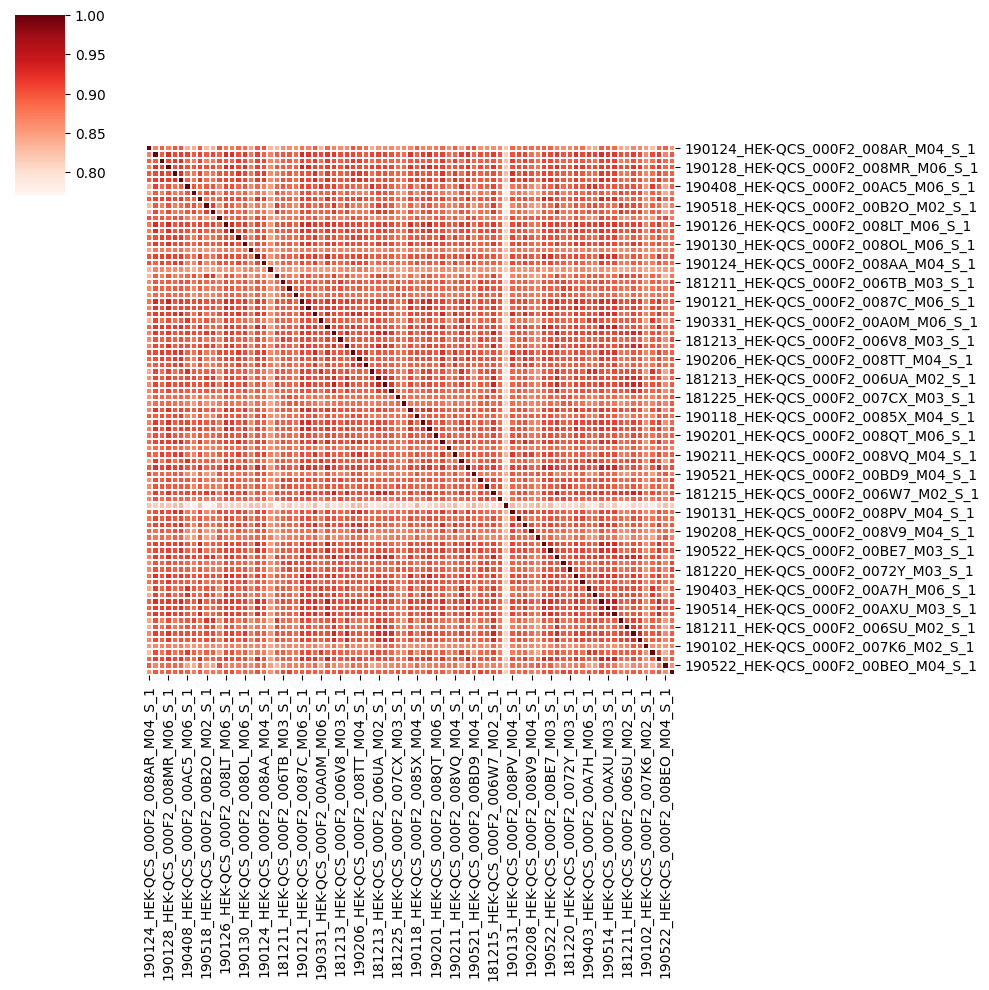

In [27]:
outpath = r'~/STAVER-revised/figs/'
correlation_heatmap(HEK293T_rawdata, method = 'spearman', log_transformed=False, outpath = outpath, filename = 'HEK-QCS_matrix_rawdata_corr_heatmap')

### The correlation heatmap of STAVER-processed data

<Figure size 1000x1000 with 0 Axes>

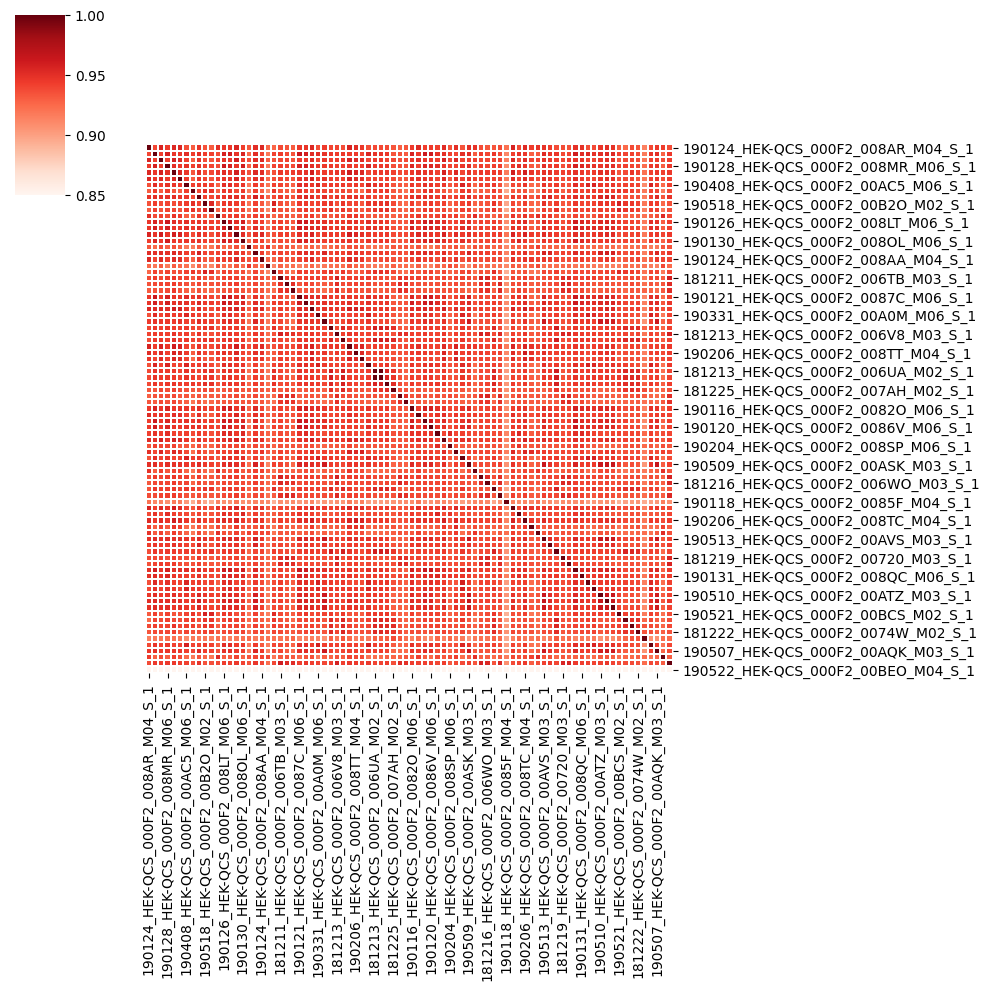

In [28]:
outpath = r'~/STAVER-revised/figs/'
correlation_heatmap(HEK293T_STAVER, method = 'spearman', log_transformed=False, outpath = outpath, filename = 'HEK-QCS_matrix_STAVER_corr_heatmap')

In [93]:
def extract_lower_triangular(df_corr):
    """
    提取相关性矩阵对角线以下的一半相关性值。

    参数:
    ----
    df_corr : pandas.DataFrame
        相关性矩阵的 DataFrame。

    返回:
    -----
    pandas.DataFrame
        包含对角线以下一半相关性值的 DataFrame。
    """
    if not isinstance(df_corr, pd.DataFrame):
        raise ValueError("df_corr 必须是 pandas.DataFrame 类型。")

    # 获取对角线以下的索引
    tril_indices = np.tril_indices(df_corr.shape[0], k=-1)

    # 提取对角线以下的一半相关性值
    lower_triangular_values = df_corr.to_numpy()[tril_indices]

    return pd.DataFrame(
        {
            'Row': df_corr.index[tril_indices[0]],
            'Column': df_corr.columns[tril_indices[1]],
            'Correlation': lower_triangular_values,
        }
    )


def get_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    print(f"The IQR1 is: {Q1}")
    print(f"The IQR3 is: {Q3}")
    mean = data.mean()
    print(f"The mean is: {mean}")
    median = data.median()
    print(f"The median is: {median}")

### The IQR of HEK293T spearman correlation matrix in rawdata

In [105]:
res = extract_lower_triangular(HEK293T_rawdata.corr())
get_IQR(res['Correlation'])

The IQR1 is: 0.8846399725
The IQR3 is: 0.907049235
The mean is: 0.893689345854834
The median is: 0.897238564


### The IQR of HEK293T spearman correlation matrix in SATVER-processed data

In [106]:
res = extract_lower_triangular(HEK293T_STAVER.corr())
get_IQR(res['Correlation'])

The IQR1 is: 0.9321159908757065
The IQR3 is: 0.9821799248475355
The mean is: 0.9523831119684066
The median is: 0.9657469442578246


### The identification protein numbers of the raw data and STAVER data

In [2]:
protein_num= pd.read_clipboard()
protein_num

,Experiment,ldentification of Protein numbers,Type
0,190124_HEK-QCS_000F2_008AR_M04_S_1,5683,Raw data
1,190124_HEK-QCS_000F2_008IQ_M06_S_1,5923,Raw data
2,190125_HEK-QCS_000F2_008JO_M04_S_1,5617,Raw data
3,190128_HEK-QCS_000F2_008MR_M06_S_1,5873,Raw data
4,190129_HEK-QCS_000F2_008NM_M04_S_1,5465,Raw data
...,...,...,...
162,190102_HEK-QCS_000F2_007K6_M02_S_1,5150,STAVER
163,190401_HEK-QCS_000F2_00A13_M06_S_1,5817,STAVER
164,190507_HEK-QCS_000F2_00AQK_M03_S_1,5961,STAVER
165,190522_HEK-QCS_000F2_00BEO_M04_S_1,5283,STAVER


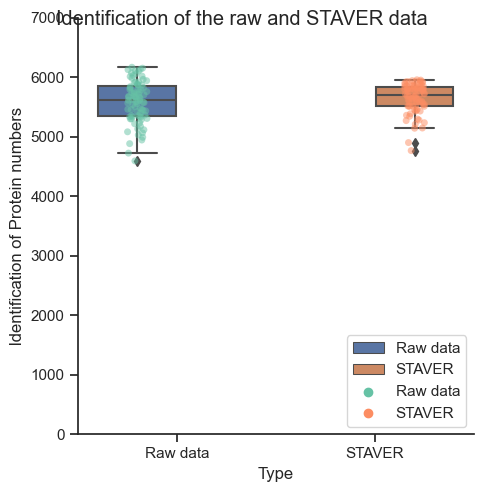

In [28]:
def plot_protein_numbers(data, x_col, y_col, title, y_lim=None, height=6, aspect=1.3):
    """
    Creates a combined box and strip plot for protein number visualization.

    Args:
        data (pd.DataFrame): DataFrame containing the data to be plotted.
        x_col (str): Column name in `data` to be plotted on the x-axis.
        y_col (str): Column name in `data` to be plotted on the y-axis.
        title (str): Title of the plot.
        y_lim (tuple, optional): Tuple specifying the limits for the y-axis (e.g., (0, 7000)).
        height (float, optional): Height (in inches) of each facet. Defaults to 6.
        aspect (float, optional): Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches. Defaults to 1.3.

    Example:
        >>> plot_protein_numbers(protein_num, 'Type', 'Identification of Protein numbers',
                                'Protein numbers of HEK293T QC samples', y_lim=(0, 7000), height=5, aspect=1)
    """
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)

    # Create a box plot
    box_plot = sns.catplot(x=x_col, y=y_col, hue=x_col, kind="box", legend=False, height=height, aspect=aspect, data=data)

    # Overlay with a strip plot
    sns.stripplot(x=x_col, y=y_col, hue=x_col, jitter=True, dodge=True, marker='o', palette="Set2", alpha=0.5, data=data)

    # Set additional plot attributes
    box_plot.fig.suptitle(title)  # Set the title for the figure
    plt.legend(loc='lower right')
    if y_lim:
        plt.ylim(y_lim)

    plt.show()

# The protein numbers of the raw data and STAVER data
plot_protein_numbers(protein_num, 'Type', 'ldentification of Protein numbers',
                     'Identification of the raw and STAVER data', y_lim=(0, 7000), height=5, aspect=1)


### The Coefficient of Variation (CVs) of the raw data and STAVER data

In [130]:
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

def plot_molecular_variance(df, column_name):
    """
    Plots the density curves of the original and STAVER processed data for comparison.

    Args:
        df: A pandas dataframe containing the data.
        column_name: A string representing the column name of the data to be plotted.

    Returns:
        None
    """
    plt.figure(figsize=(5, 4))

    # Density plot of the original data
    sns.kdeplot(df[df[column_name]=='Raw data']['Coefficient of Variation [%]'], label='Original Density', color='blue', linestyle="--")

    # Density plot of the STAVER-processed data
    sns.kdeplot(df[df[column_name]=='STAVER']['Coefficient of Variation [%]'], label='STAVER Density', color='red')

    plt.legend()
    plt.title('Coefficient of Variation density curve')
    plt.xlabel("Coefficient of Variation [%]")
    plt.ylabel('Density')
    plt.show()


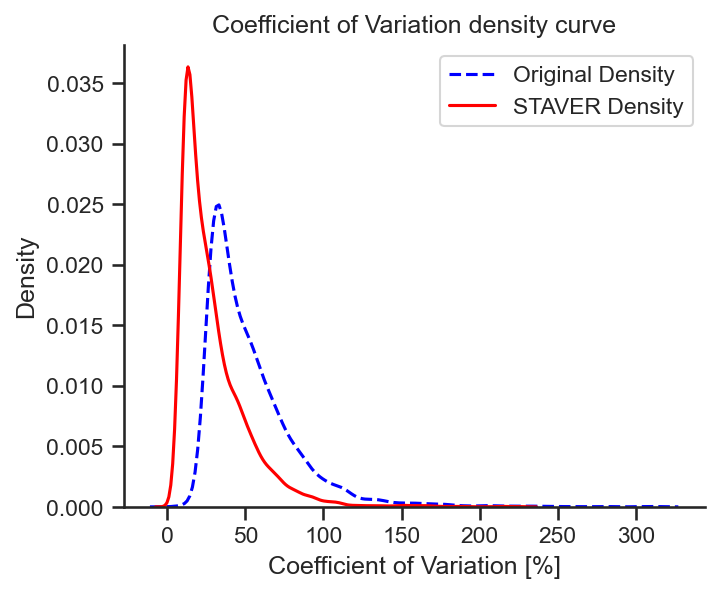

In [131]:
protein_cv = pd.read_csv("~/STAVER-revised/Pan-cancer-cell-lines/HEK293T_Protein_CV_Compare.csv")
plot_molecular_variance(protein_cv, 'Type')

## The advantages of the STAVER algorithm to uncover inherent biological differences

Distinct tumors often exhibit diverse molecular characteristics **(Cell, 2014, PMID: 25109877; Cell, 2023, PMID: 37582357)**, with even different histological subtypes of the same tumor demonstrating significant molecular heterogeneity **(Science, 2014, PMID: 25301631; Cancer Cell, 2023, PMID: 36563681)**, contributing to challenges in cancer treatment. Thus, accurately deciphering the inherent molecular heterogeneity of various cancer types, especially in high-dimensional data such as proteomics, is vital for precision treatments and ultimately improved patient outcomes. 

To demonstrate the superior advantages of the STAVER algorithm to uncover inherent biological differences, we comprehensively compared the original data and STAVER-processed data of the 1,242 cancer cell line samples from diverse cancer types. 

### The UMAP analysis of diverse 1242 cancer cell line samples

In [98]:
def visualize_cancer_subtypes(proteomics_data_path, 
                              subtypes_file_path, 
                              color_params=['Batch', 'Tissue_type', 'Cancer_type'],
                              figsize_per_plot=(4.5, 4),
                              legend_loc="on data",
                              outpath='./',
                              filename=None,
                              add_outline=False,
                              show_plot=False):
    """
    Visualize the given proteomics data and cancer subtypes using t-SNE and UMAP.

    Args:
        proteomics_data_path (str): Path to the proteomics data (samples as rows, proteins as columns).
        subtypes_file_path (str): Path to the file with samples and their corresponding cancer subtypes.
        color_params (list): List of parameters to color by in the plots.
        figsize_per_plot (tuple): Size of each individual plot.
        outpath (str): Directory to save the plots.
        filename (str): Prefix of the saved files.

    Returns:
        None. Generates visualization images for t-SNE and UMAP.
    """

    # Load data
    data = pd.read_csv(proteomics_data_path, index_col=0).T.replace(np.nan, 0)

    # Load subtype information
    subtypes = pd.read_csv(subtypes_file_path, index_col=0)

    # Check for missing subtype information
    if not all(sample in subtypes.index for sample in data.index):
        raise ValueError("Some samples lack subtype information!")

    # Convert data to AnnData format
    adata = anndata.AnnData(X=data)

    # Add subtype information to AnnData
    adata.obs = subtypes.loc[adata.obs_names]

    # Data normalization (if required)
    sc.pp.scale(adata)

    # Compute t-SNE and UMAP
    sc.tl.tsne(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)

    # Set filenames if not provided
    if not filename:
        filename = os.path.basename(proteomics_data_path).split('.')[0]

    # # Visualize t-SNE
    # fig, axes = plt.subplots(figsize=(len(color_params)*figsize_per_plot[0], figsize_per_plot[1]), nrows=1, ncols=len(color_params))
    # for i, param in enumerate(color_params):
    #     sc.pl.tsne(adata, color=param, legend_loc=legend_loc, title=f"t-SNE colored by {param}", ax=axes[i], show=show_plot)
    # fig.tight_layout()
    # fig.savefig(os.path.join(outpath, f"{filename}_tsne.pdf"))
    # plt.close(fig)

    # # Visualize UMAP
    # fig, axes = plt.subplots(figsize=(len(color_params)*figsize_per_plot[0], figsize_per_plot[1]), nrows=1, ncols=len(color_params))
    # for i, param in enumerate(color_params):
    #     sc.pl.umap(adata, color=param, legend_loc=legend_loc, title=f"UMAP colored by {param}", ax=axes[i], show=show_plot)
    # fig.tight_layout()
    # fig.savefig(os.path.join(outpath, f"{filename}_umap.pdf"))
    # plt.close(fig)

    # Determine the number of plots (number of color_params x 2 for both t-SNE and UMAP)
    nrows = 2
    ncols = len(color_params)

    # Create a figure with the necessary number of subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * figsize_per_plot[0], nrows * figsize_per_plot[1]))

    # Visualize t-SNE on the first row
    for i, param in enumerate(color_params):
        sc.pl.tsne(adata, color=param, legend_loc=legend_loc, title=f"t-SNE colored by {param}", add_outline=add_outline, ax=axes[0, i], show=show_plot)

    # Visualize UMAP on the second row
    for i, param in enumerate(color_params):
        sc.pl.umap(adata, color=param, legend_loc=legend_loc, title=f"UMAP colored by {param}", add_outline=add_outline, ax=axes[1, i], show=show_plot)

    # Save the combined visualization
    fig.tight_layout()
    fig.savefig(os.path.join(outpath, f"{filename}_combined.pdf"))
    plt.show()
    plt.close(fig)

    return adata

### The UMAP analysis of the Rawdata

By employing UMAP analysis, the results indicated that the STAVER algorithm did not introduce batch effects, corroborating the original data findings **(Figure RL2H-2I and Figure RL5H-5I)**. In the original data, the UMAP analysis showed that the 1,242 cancer cell line samples were diffusely distributed across various tissue sources and cancer types and did not show a clear separation. This lack of distinction was particularly evidenced among bladder, colorectal, pancreatic, gastric, and hepatocellular cancer cell lines, which intermixed with each other **(Figure RL2H and Figure RL5H)**. 

         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


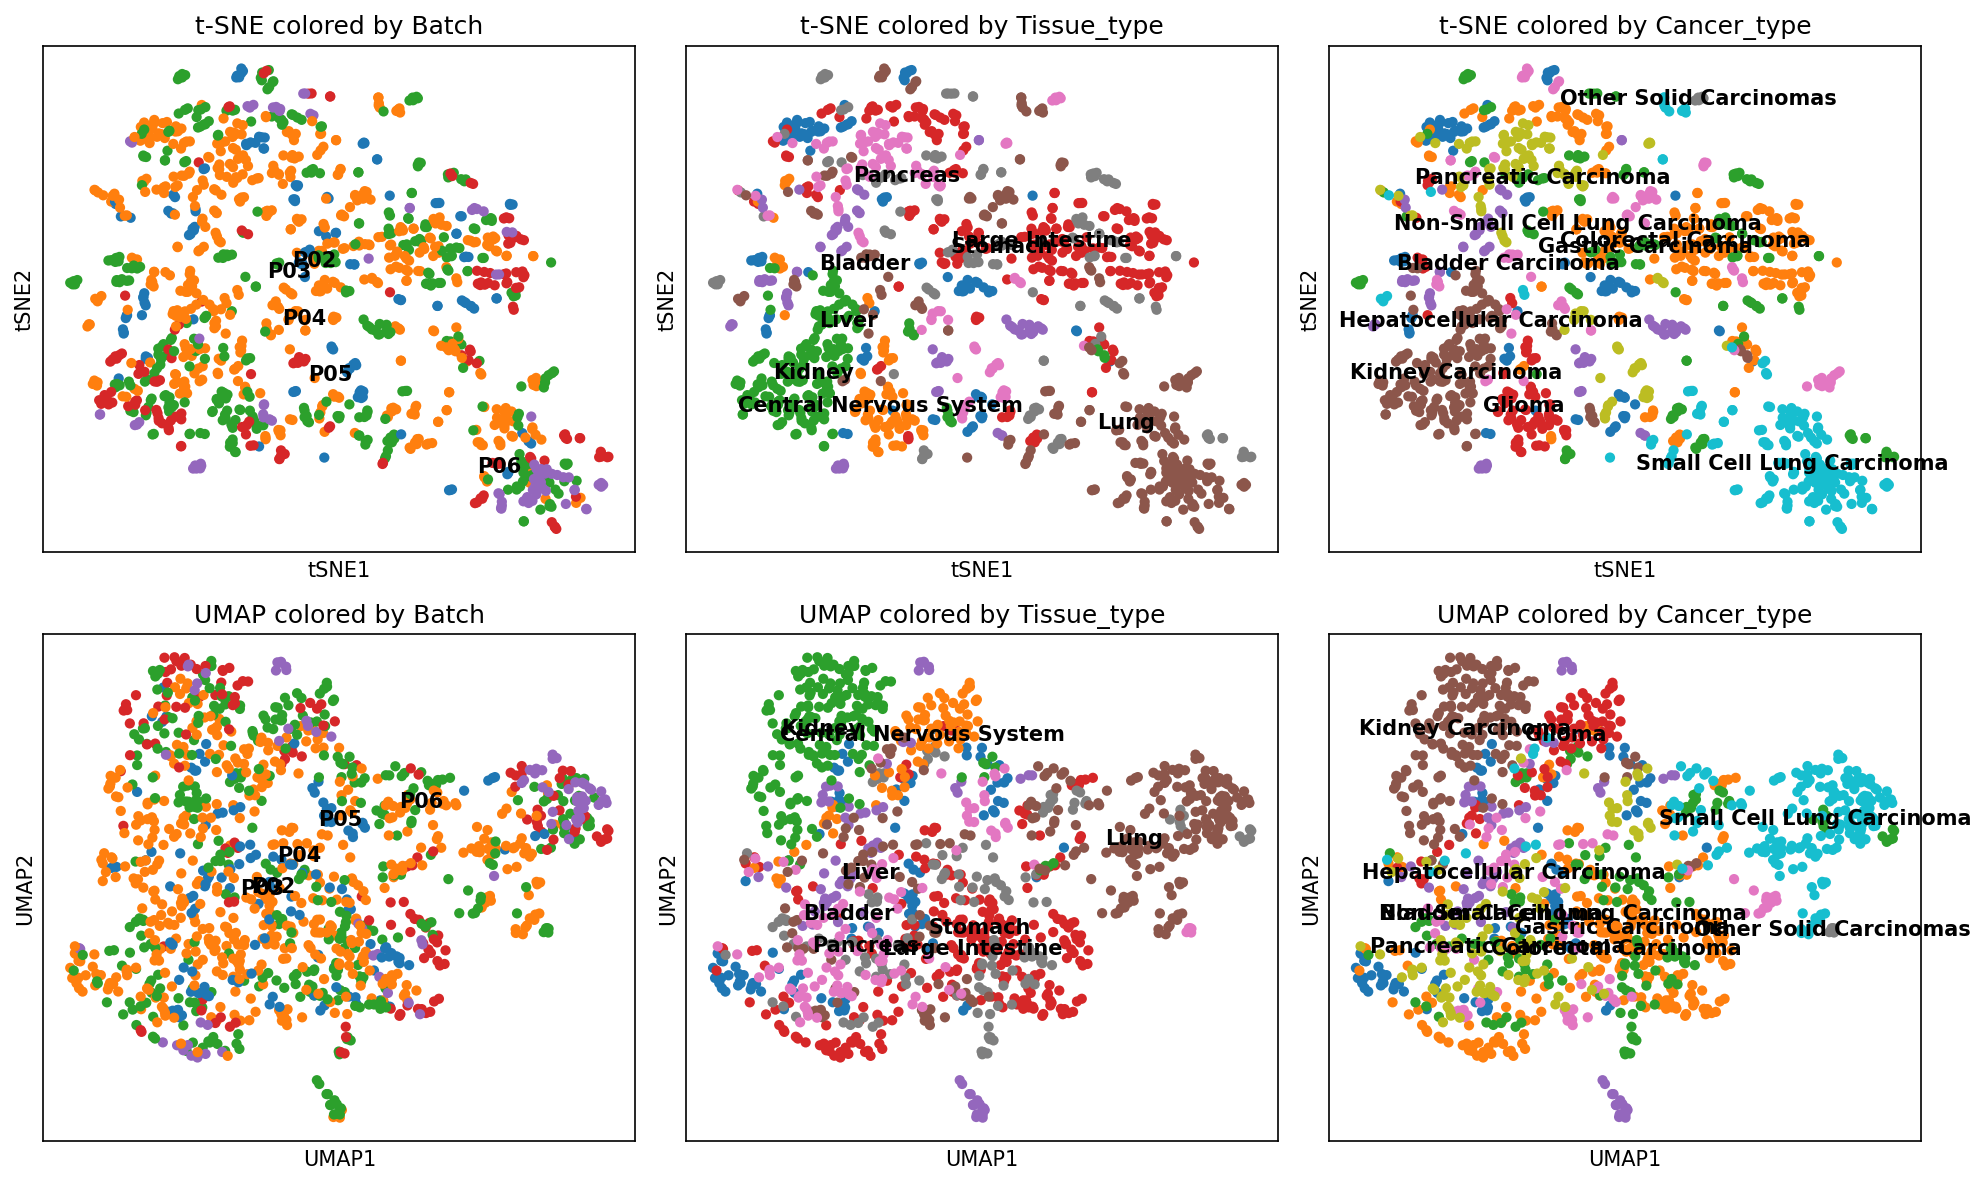

In [100]:
outpath = '~/DIA-STAVER/STAVER-nc-revised/revised-sript/figs-1/'
if not os.path.exists(outpath):
    os.makedirs(outpath)
adata_rawdata = visualize_cancer_subtypes("~/STAVER-revised/PCA/rawdata_data.csv", "~/STAVER-revised/PCA/metadata_anatation_scanpy.csv", outpath=outpath, filename = "Raw_data_2")

### The UMAP analysis of STAVER-processed data

When analyzing STAVER-processed data, UMAP visualization clearly separated the 1,242 cancer cell line samples by tissue sources and cancer types **(Figure RL2I and Figure RL5I)**. Notably, the STAVER-processed data revealed that cancer cell lines from the digestive tract, such as intestinal, gastric, and pancreatic, exhibited more molecular similarities than their nondigestive tract counterparts (lung, glioma, and kidney cancer cell lines). These findings highlighted the potential superiority of the STAVER algorithm in elucidating the intrinsic biological differences among diverse tumor cell lines.

         Falling back to preprocessing with `sc.pp.pca` and default params.


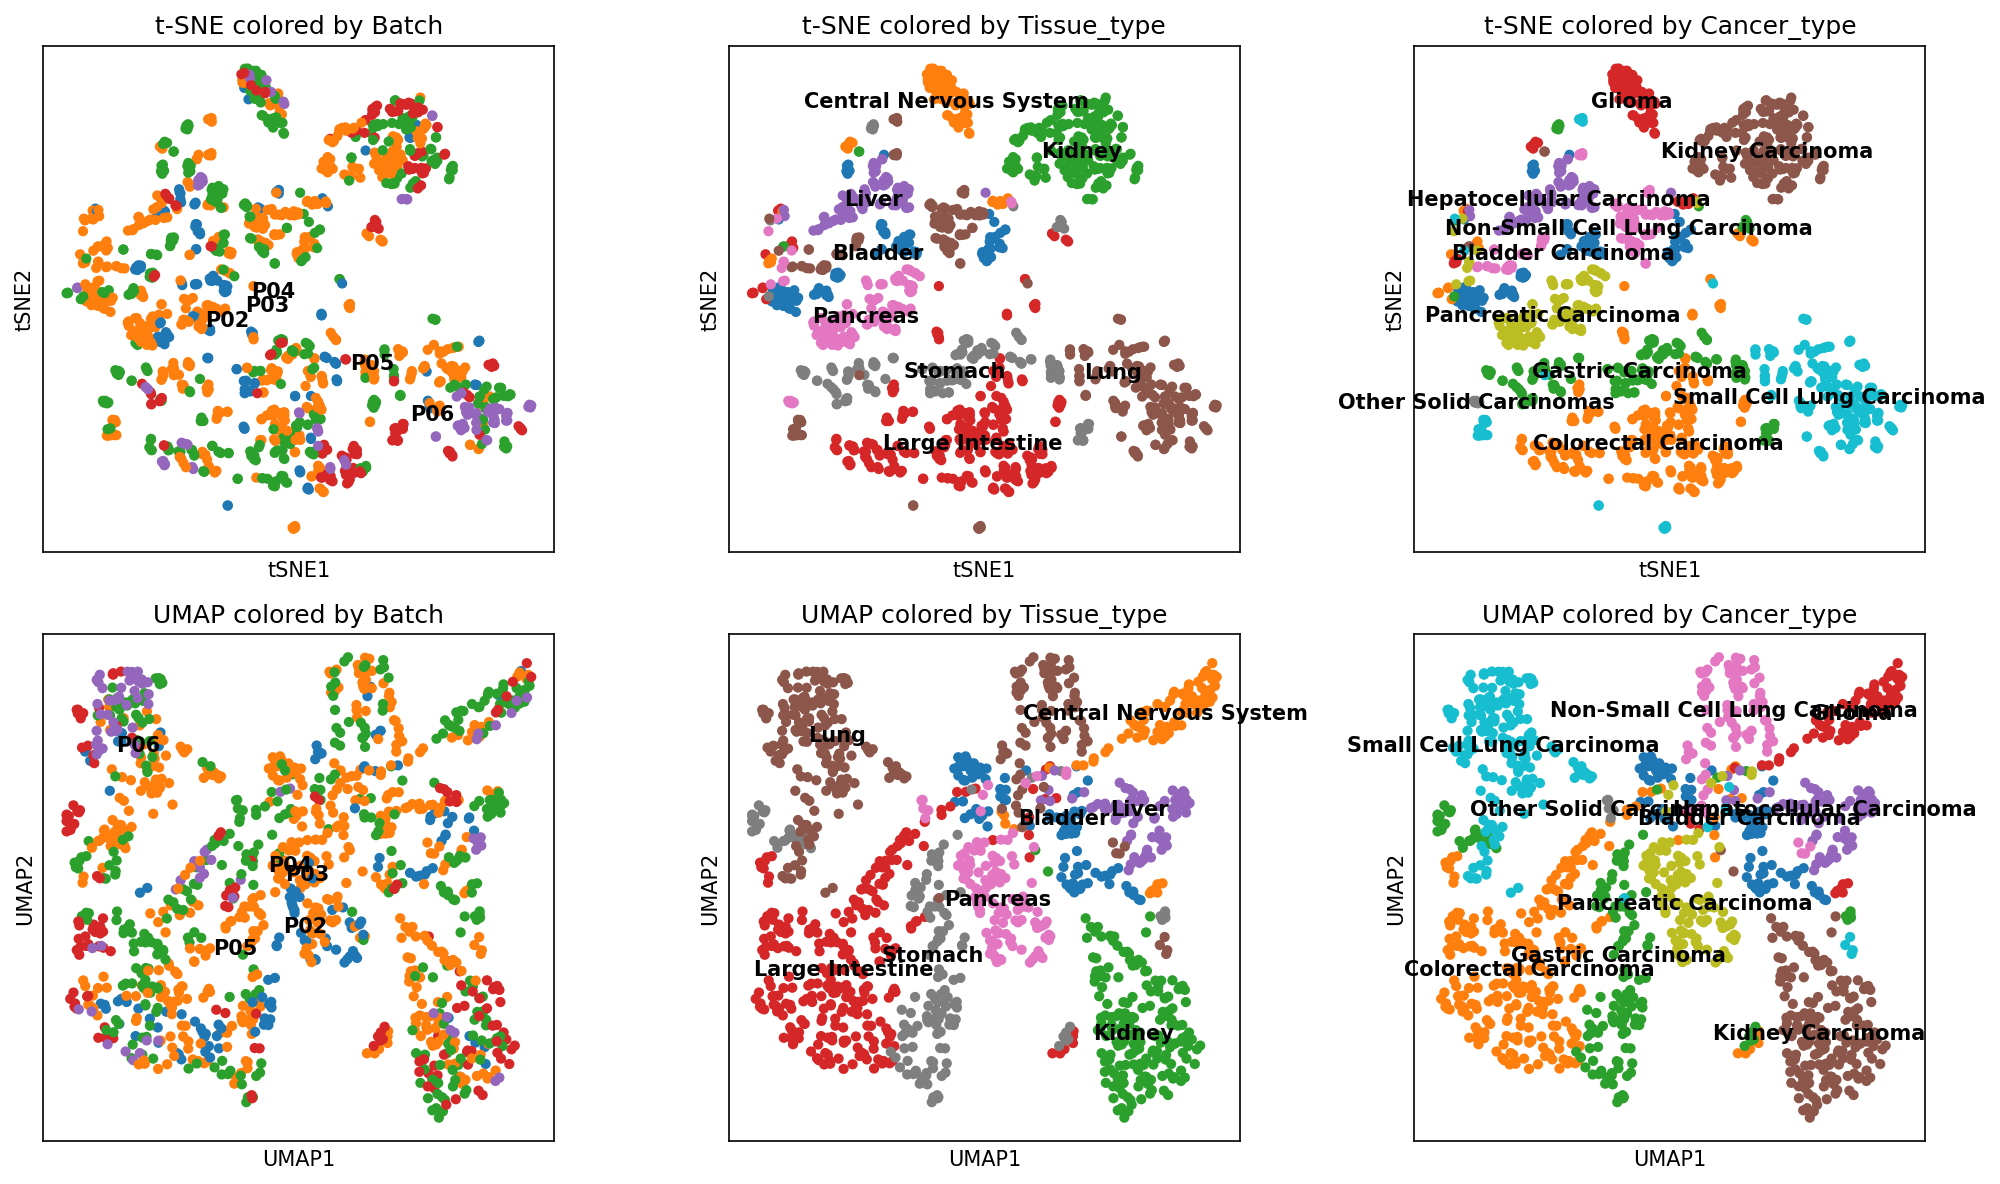

In [102]:
outpath = '~/DIA-STAVER/STAVER-nc-revised/revised-sript/figs-1/'
if not os.path.exists(outpath):
    os.makedirs(outpath)

adata_STAVER = visualize_cancer_subtypes("~/STAVER-revised/PCA/STAVER_data.csv", "~/STAVER-revised/PCA/metadata_anatation_scanpy.csv", outpath=outpath, filename = "STAVER_data_2")

### Cancer specific proteins
To rigorously establish the advantages of the STAVER algorithm in identifying tumor cell-specific proteins, we compared the distribution patterns of cell-specific protein expression profiles between the original and STAVER-processed data. We incorporated the [Human Protein Atlas (HPA)](https://www.proteinatlas.org) molecular annotations of tumor cell specificity and their expression profiles across various cancer cell lines for integrated analysis.

The results demonstrated that the STAVER-processed data more accurately reflected cancer type-specific expression patterns than the original proteomic data.

In [4]:
HPA_dataset = pd.read_csv("~/STAVER-nc-revised/resources/proteinatlas_56a92855.tsv", sep="\t")
HPA_dataset

,Gene,Gene synonym,Ensembl,Gene description,Uniprot,Chromosome,Position,Protein class,Biological process,Molecular function,...,Pathology prognostics - Lung cancer,Pathology prognostics - Melanoma,Pathology prognostics - Ovarian cancer,Pathology prognostics - Pancreatic cancer,Pathology prognostics - Prostate cancer,Pathology prognostics - Renal cancer,Pathology prognostics - Stomach cancer,Pathology prognostics - Testis cancer,Pathology prognostics - Thyroid cancer,Pathology prognostics - Urothelial cancer
0,A1BG,NaN,ENSG00000121410,Alpha-1-B glycoprotein,P04217,19,58345178-58353492,"Plasma proteins, Predicted intracellular prote...",NaN,NaN,...,unprognostic (1.09e-1),unprognostic (2.59e-1),unprognostic (2.10e-1),unprognostic (1.47e-2),unprognostic (1.37e-2),unprognostic (4.19e-5),unprognostic (2.37e-2),unprognostic (1.94e-1),unprognostic (1.72e-1),unprognostic (6.72e-2)
1,A1CF,"ACF, ACF64, ACF65, APOBEC1CF, ASP",ENSG00000148584,APOBEC1 complementation factor,Q9NQ94,10,50799409-50885675,Predicted intracellular proteins,mRNA processing,RNA-binding,...,unprognostic (7.38e-3),NaN,unprognostic (1.30e-2),unprognostic (2.46e-2),unprognostic (1.20e-1),unprognostic (1.90e-3),unprognostic (1.97e-2),unprognostic (2.77e-1),unprognostic (2.19e-2),unprognostic (8.50e-4)
2,A2M,"CPAMD5, FWP007, S863-7",ENSG00000175899,Alpha-2-macroglobulin,P01023,12,9067664-9116229,"Cancer-related genes, Candidate cardiovascular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (3.65e-2),unprognostic (2.38e-1),unprognostic (7.19e-2),unprognostic (4.71e-2),unprognostic (2.06e-2),unprognostic (1.28e-2),unprognostic (8.04e-3),unprognostic (2.32e-2),unprognostic (8.58e-2),unprognostic (9.03e-3)
3,A2ML1,"CPAMD9, FLJ25179, p170",ENSG00000166535,Alpha-2-macroglobulin like 1,A8K2U0,12,8822621-8887001,"Disease related genes, Predicted intracellular...",NaN,"Protease inhibitor, Serine protease inhibitor",...,unprognostic (7.58e-3),unprognostic (2.63e-1),unprognostic (1.57e-1),unprognostic (1.15e-3),unprognostic (2.03e-1),unprognostic (1.06e-9),unprognostic (2.28e-1),unprognostic (3.07e-1),unprognostic (5.88e-2),unprognostic (2.42e-2)
4,A3GALT2,"A3GALT2P, IGB3S, IGBS3S",ENSG00000184389,"Alpha 1,3-galactosyltransferase 2",U3KPV4,1,33306766-33321098,"Enzymes, Predicted membrane proteins",Lipid metabolism,"Glycosyltransferase, Transferase",...,unprognostic (4.96e-2),unprognostic (6.83e-2),unprognostic (5.81e-2),unprognostic (1.23e-1),unprognostic (1.89e-1),unprognostic (4.90e-8),unprognostic (1.17e-1),NaN,unprognostic (1.12e-2),unprognostic (7.87e-2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20157,ZYG11A,ZYG11,ENSG00000203995,"Zyg-11 family member A, cell cycle regulator",Q6WRX3,1,52842511-52894998,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (2.34e-1),unprognostic (4.56e-2),unprognostic (2.06e-2),unprognostic (4.01e-2),unprognostic (1.01e-1),unprognostic (6.15e-3),unprognostic (2.95e-1),unprognostic (1.21e-1),unprognostic (3.07e-1),unprognostic (1.02e-1)
20158,ZYG11B,"FLJ13456, ZYG11",ENSG00000162378,"Zyg-11 family member B, cell cycle regulator",Q9C0D3,1,52726453-52827336,Predicted intracellular proteins,Ubl conjugation pathway,NaN,...,unprognostic (1.85e-1),unprognostic (4.84e-3),unprognostic (5.06e-2),unprognostic (2.76e-1),unprognostic (6.08e-2),prognostic favorable (9.80e-7),unprognostic (2.22e-1),unprognostic (3.37e-1),unprognostic (1.13e-1),unprognostic (9.57e-2)
20159,ZYX,NaN,ENSG00000159840,Zyxin,Q15942,7,143381295-143391111,"Plasma proteins, Predicted intracellular proteins","Cell adhesion, Host-virus interaction",NaN,...,unprognostic (1.66e-3),unprognostic (2.60e-1),unprognostic (4.22e-1),unprognostic (1.98e-1),unprognostic (2.43e-1),prognostic unfavorable (7.92e-5),unprognostic (1.39e-1),unprognostic (8.12e-2),unprognostic (1.95e-1),unprognostic (6.72e-2)
20160,ZZEF1,"FLJ10821, KIAA0399, ZZZ4",ENSG00000074755,Zinc finger ZZ-type and EF-hand domain contain...

In [6]:
def get_hpa_expression_profile(protein):
    HPA = HPA_dataset[['Gene', 'RNA cell line specific nTPM']]
    HPA.set_index('Gene', inplace=True)

    return HPA.loc[protein, "RNA cell line specific nTPM"]

### CTSE overexpression in Gastric, pancreatic, and colorectal cancer of HPA dataset

In [9]:
get_hpa_expression_profile("CTSE")

'colorectal cancer: 28.4;Esophageal cancer: 48.8;Gastric cancer: 110.7;pancreatic cancer: 35.3'

In [10]:
HPA_protein_CTSE = {
    'Bladder Carcinoma': 0,
    'Colorectal Carcinoma': 28.4,
    'Gastric Carcinoma': 110.7,
    'Glioma': 0,
    'Hepatocellular Carcinoma': 0,
    'Kidney Carcinoma': 0,
    'NSCLC': 0,
    'Pancreatic Carcinoma': 35.3,
    'SCLC': 0
}


HPA_protein_CTSE = pd.DataFrame.from_dict(HPA_protein_CTSE, orient='index', columns=['CTSE'])
HPA_protein_CTSE = HPA_protein_CTSE.sort_values(by=['CTSE'], ascending=False)
HPA_protein_CTSE 

,CTSE
Gastric Carcinoma,110.7
Pancreatic Carcinoma,35.3
Colorectal Carcinoma,28.4
Bladder Carcinoma,0.0
Glioma,0.0
Hepatocellular Carcinoma,0.0
Kidney Carcinoma,0.0
NSCLC,0.0
SCLC,0.0


In [11]:
STAVER = pd.read_csv("~/STAVER-revised/model-evlauate/STAVER_data.csv", index_col=0)
raw_data = pd.read_csv("~/STAVER-revised/model-evlauate/raw_data.csv", index_col=0)

In [12]:
def process_data(data, target_gene):
    df = data[[target_gene, 'Cancer_type']]
    df.replace(0, np.nan, inplace=True)
    df.drop(df[df['Cancer_type'] == 'Other Solid Carcinomas'].index, inplace=True)
    df = df.groupby('Cancer_type').median()
    df = df.sort_values(by=[target_gene], ascending=False)
    return df

In [13]:
rawdata_CTSE = process_data(raw_data, "CTSE")
rawdata_CTSE.sort_values(by=['CTSE'], ascending=False, inplace=True)
rawdata_CTSE

,CTSE
Cancer_type,
Gastric Carcinoma,13.064867
Pancreatic Carcinoma,13.046290
Hepatocellular Carcinoma,12.683957
Colorectal Carcinoma,11.875120
Non-Small Cell Lung Carcinoma,11.738225
Bladder Carcinoma,11.182161
Small Cell Lung Carcinoma,10.270660
Kidney Carcinoma,10.095740
Glioma,NaN


In [17]:
STAVER_CTSE = process_data(STAVER, "CTSE")
STAVER_CTSE.sort_values(by=['CTSE'], ascending=False, inplace=True)
STAVER_CTSE

,CTSE
Cancer_type,
Gastric Carcinoma,9.501038
Pancreatic Carcinoma,8.500000
Colorectal Carcinoma,8.050000
Bladder Carcinoma,NaN
Glioma,NaN
Hepatocellular Carcinoma,NaN
Kidney Carcinoma,NaN
Non-Small Cell Lung Carcinoma,NaN
Small Cell Lung Carcinoma,NaN


In [ ]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['figure.dpi']= 150 # 一般将dpi设置在150到300之间

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

def plot_barplot(df, target_col, log_transform=False, x_label=None, y_label=None, title=None, save_path=None):
    """
    Plots a barplot.

    Args:
        df (pd.DataFrame): The dataframe.
        target_col (str): The column name to be plotted as the target column.
        x_label (str): The x-axis label. Default is None.
        y_label (str): The y-axis label. Default is None.
        title (str): The title of the plot. Default is None.
        save_path (str): The path to save the image. Default is None, indicating no saving.

    Returns:
        None
    """
    
    plt.figure(figsize=(4, 2.7))
    if log_transform:
        sns.barplot(x=df.index, y=np.log2(df[target_col]+1))
    # Use seaborn's barplot function to plot the graph
    else:
        sns.barplot(x=df.index, y=df[target_col])

    # Set the title and axis labels
    if title:
        plt.title(title)
    if x_label:
        plt.xlabel(x_label)
    else:
        plt.xlabel("Index")
    if y_label:
        plt.ylabel(y_label)
    else:
        plt.ylabel(target_col)

    plt.xticks(rotation=30, ha='right')  # Rotate the x-axis labels for better display
    
    # Save the image (if save_path is specified)
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    # Show the image
    plt.show()


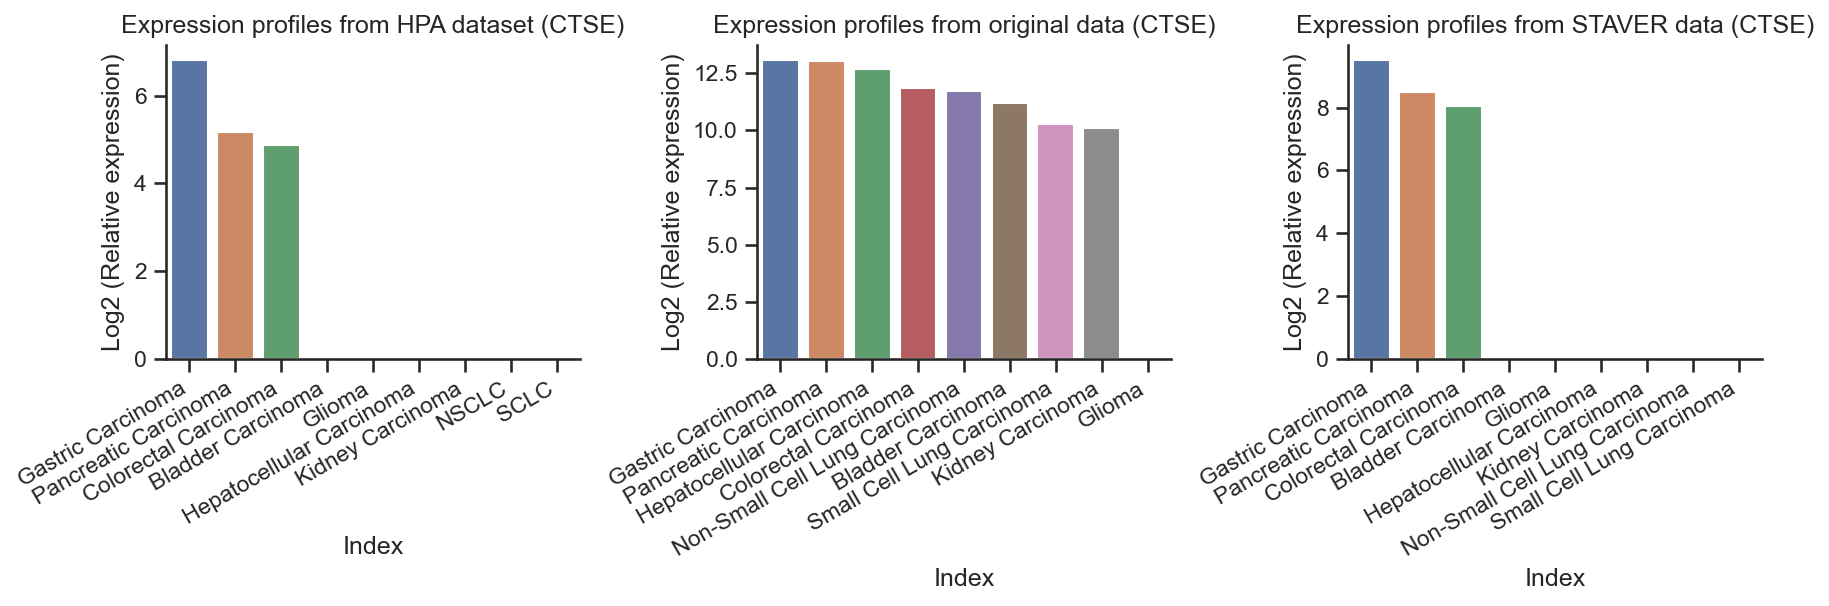

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 全局的绘图参数设置
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['figure.dpi'] = 150

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

def plot_combined_barplots(datasets, target_col, titles, log_transforms, x_labels, y_labels, save_path=None):
    """
    Plots multiple barplots on a single figure, one for each dataset provided.
    """

    if not all(len(lst) == len(datasets) for lst in [titles, log_transforms, x_labels, y_labels]):
        raise ValueError("All list arguments must be of the same length as the 'datasets' list.")

    n = len(datasets)
    fig, axes = plt.subplots(1, n, figsize=(n * 4, 4.2))
    
    if n == 1:  # If there is only one dataset, axes will not be an array
        axes = [axes]

    for i, (df, title, log_transform, x_label, y_label) in enumerate(zip(datasets, titles, log_transforms, x_labels, y_labels)):
        ax = axes[i]
        plot_data = np.log2(df[target_col]+1) if log_transform else df[target_col]
        sns.barplot(ax=ax, x=df.index, y=plot_data)
        ax.set_title(title)
        ax.set_xlabel(x_label if x_label else "Index")
        ax.set_ylabel(y_label if y_label else target_col)

        # Set the tick parameters and label rotation
        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

    # Adjust the left margin if needed
    plt.subplots_adjust(left=0.1)  # You might need to tweak this value

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.tight_layout()
    plt.show()


# The barplot of CTSE expression profiles
plot_combined_barplots(
    datasets=[HPA_protein_CTSE, rawdata_CTSE, STAVER_CTSE],
    target_col="CTSE",
    titles=["Expression profiles from HPA dataset (CTSE)", 
            "Expression profiles from original data (CTSE)", 
            "Expression profiles from STAVER data (CTSE)"],
    log_transforms=[True, False, False],
    x_labels=[None, None, None],
    y_labels=["Log2 (Relative expression)", 
            "Log2 (Relative expression)", 
            "Log2 (Relative expression)"],
    save_path="combined_barplots_CTSE.pdf"
)


In [ ]:
# The barplot of CTSE expression profiles
plot_combined_barplots(
        datasets=[HPA_protein_CTSE, rawdata_CTSE, STAVER_CTSE],
        target_col="CTSE",
        titles=["Expression profiles from HPA dataset (CTSE)", 
                "Expression profiles from original data (CTSE)", 
                "Expression profiles from STAVER data (CTSE)"],
        log_transforms=[True, False, False],
        x_labels=[None, None, None],
        y_labels=["Log2 (Relative expression)", 
                "Log2 (Relative expression)", 
                "Log2 (Relative expression)"],
        save_path="combined_barplots_CTSE.pdf"
)

### GPA33 overexpression in colorectal cancer and Gastric cancer of HPA dataset

In [34]:
get_hpa_expression_profile("GPA33")

'Bile duct cancer: 34.1;colorectal cancer: 100.5;Gastric cancer: 19.1'

In [35]:
HPA_protein_CTSE = {
    'Bladder Carcinoma': 0,
    'Colorectal Carcinoma': 100.5,
    'Gastric Carcinoma': 19.1,
    'Glioma': 0,
    'Hepatocellular Carcinoma': 0,
    'Kidney Carcinoma': 0,
    'NSCLC': 0,
    'Pancreatic Carcinoma': 0,
    'SCLC': 0
}


HPA_protein_GPA33 = pd.DataFrame.from_dict(HPA_protein_CTSE, orient='index', columns=['GPA33'])
HPA_protein_GPA33 = HPA_protein_GPA33.sort_values(by=['GPA33'], ascending=False)
HPA_protein_GPA33 

,GPA33
Colorectal Carcinoma,100.5
Gastric Carcinoma,19.1
Bladder Carcinoma,0.0
Glioma,0.0
Hepatocellular Carcinoma,0.0
Kidney Carcinoma,0.0
NSCLC,0.0
Pancreatic Carcinoma,0.0
SCLC,0.0


In [39]:
rawdata_GPA33 = process_data(raw_data, "GPA33")
rawdata_GPA33.sort_values(by=['GPA33'], ascending=False, inplace=True)
rawdata_GPA33

,GPA33
Cancer_type,
Colorectal Carcinoma,16.132530
Gastric Carcinoma,14.659133
Non-Small Cell Lung Carcinoma,13.211101
Pancreatic Carcinoma,10.548243
Hepatocellular Carcinoma,9.851693
Kidney Carcinoma,9.565263
Bladder Carcinoma,9.219547
Small Cell Lung Carcinoma,9.125549
Glioma,9.036120


In [41]:
STAVER_GPA33 = process_data(STAVER, "GPA33")
STAVER_GPA33.sort_values(by=['GPA33'], ascending=False, inplace=True)
STAVER_GPA33

,GPA33
Cancer_type,
Colorectal Carcinoma,9.632096
Gastric Carcinoma,7.820000
Bladder Carcinoma,NaN
Glioma,NaN
Hepatocellular Carcinoma,NaN
Kidney Carcinoma,NaN
Non-Small Cell Lung Carcinoma,NaN
Pancreatic Carcinoma,NaN
Small Cell Lung Carcinoma,NaN


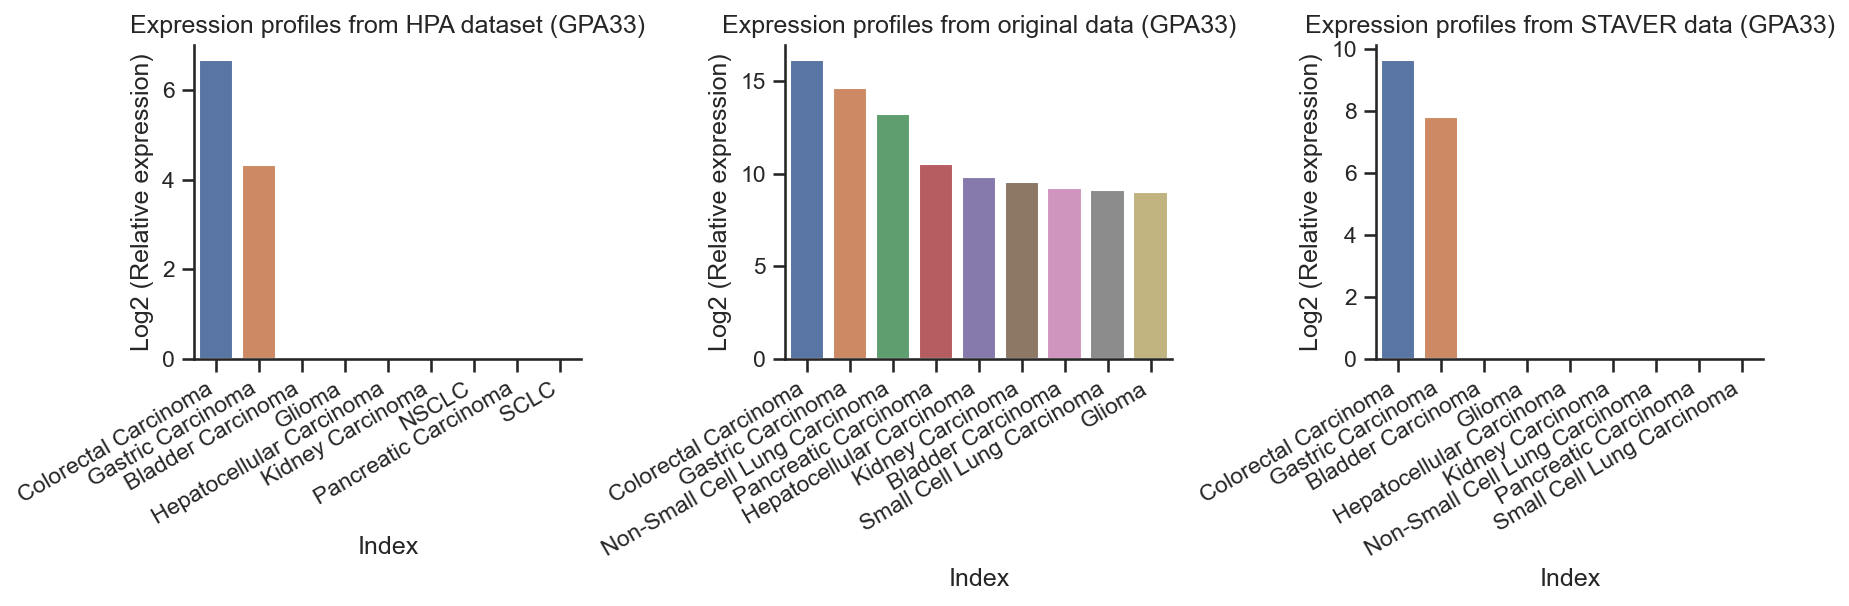

In [42]:
# The barplot of GPA33 expression profiles
plot_combined_barplots(
        datasets=[HPA_protein_GPA33, rawdata_GPA33, STAVER_GPA33],
        target_col="GPA33",
        titles=["Expression profiles from HPA dataset (GPA33)", 
                "Expression profiles from original data (GPA33)", 
                "Expression profiles from STAVER data (GPA33)"],
        log_transforms=[True, False, False],
        x_labels=[None, None, None],
        y_labels=["Log2 (Relative expression)", 
                "Log2 (Relative expression)", 
                "Log2 (Relative expression)"],
        save_path="combined_barplots_GPA33.pdf"
)

### ADGRF1 overexpression in pancreatic cancer of HPA dataset

In [43]:
get_hpa_expression_profile("ADGRF1")

'pancreatic cancer: 62.2'

In [44]:
HPA_protein_CTSE = {
    'Bladder Carcinoma': 0,
    'Colorectal Carcinoma': 0,
    'Gastric Carcinoma': 0,
    'Glioma': 0,
    'Hepatocellular Carcinoma': 0,
    'Kidney Carcinoma': 0,
    'NSCLC': 0,
    'Pancreatic Carcinoma': 62.2,
    'SCLC': 0
}


HPA_protein_ADGRF1 = pd.DataFrame.from_dict(HPA_protein_CTSE, orient='index', columns=['ADGRF1'])
HPA_protein_ADGRF1 = HPA_protein_ADGRF1.sort_values(by=['ADGRF1'], ascending=False)
HPA_protein_ADGRF1

,ADGRF1
Pancreatic Carcinoma,62.2
Bladder Carcinoma,0.0
Colorectal Carcinoma,0.0
Gastric Carcinoma,0.0
Glioma,0.0
Hepatocellular Carcinoma,0.0
Kidney Carcinoma,0.0
NSCLC,0.0
SCLC,0.0


In [45]:
rawdata_ADGRF1 = process_data(raw_data, "ADGRF1")
rawdata_ADGRF1.sort_values(by=['ADGRF1'], ascending=False, inplace=True)
rawdata_ADGRF1

,ADGRF1
Cancer_type,
Pancreatic Carcinoma,10.272240
Gastric Carcinoma,10.256628
Colorectal Carcinoma,10.093484
Bladder Carcinoma,9.910033
Glioma,NaN
Hepatocellular Carcinoma,NaN
Kidney Carcinoma,NaN
Non-Small Cell Lung Carcinoma,NaN
Small Cell Lung Carcinoma,NaN


In [46]:
STAVER_ADGRF1 = process_data(STAVER, "ADGRF1")
STAVER_ADGRF1.sort_values(by=['ADGRF1'], ascending=False, inplace=True)
STAVER_ADGRF1

,ADGRF1
Cancer_type,
Pancreatic Carcinoma,7.594326
Bladder Carcinoma,NaN
Colorectal Carcinoma,NaN
Gastric Carcinoma,NaN
Glioma,NaN
Hepatocellular Carcinoma,NaN
Kidney Carcinoma,NaN
Non-Small Cell Lung Carcinoma,NaN
Small Cell Lung Carcinoma,NaN


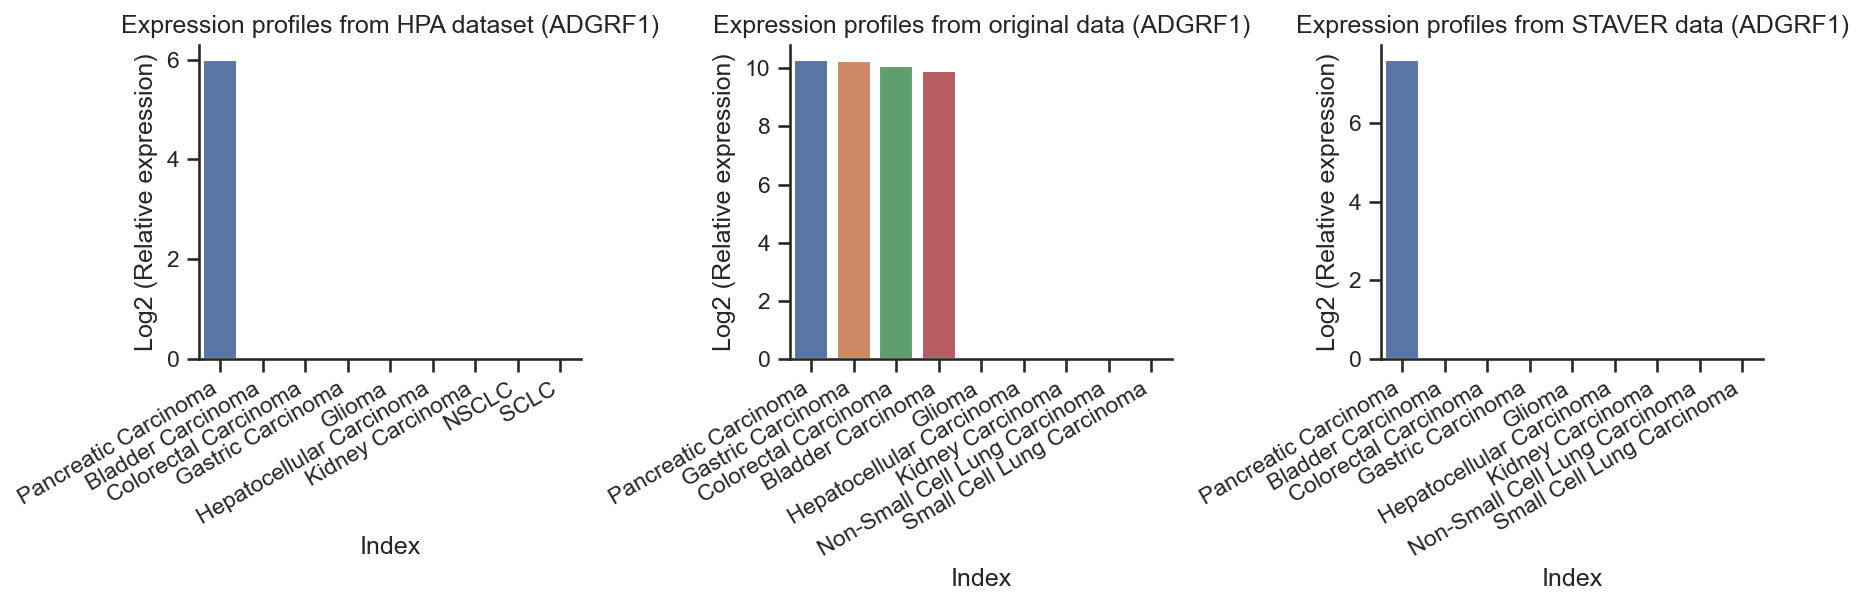

In [47]:
# The barplot of ADGRF1 expression profiles
plot_combined_barplots(
        datasets=[HPA_protein_ADGRF1, rawdata_ADGRF1, STAVER_ADGRF1],
        target_col="ADGRF1",
        titles=["Expression profiles from HPA dataset (ADGRF1)", 
                "Expression profiles from original data (ADGRF1)", 
                "Expression profiles from STAVER data (ADGRF1)"],
        log_transforms=[True, False, False],
        x_labels=[None, None, None],    
        y_labels=["Log2 (Relative expression)", 
                "Log2 (Relative expression)", 
                "Log2 (Relative expression)"],
        save_path="combined_barplots_ADGRF1.pdf"
)

## The reproducibility of the STAVER algorithm in identifying the previously reported tumor biomarkers

To further validate the superior reproducibility of the STAVER algorithm in identifying tumor biomarkers, a systematic literature review was conducted. According to the systematic literature review, a series of cancer biomarkers were selected to further evaluate the STAVER algorithm **(Table RL1 and Table RL4)**. We utilized the original and STAVER-processed proteomic data to examine the expression differences of these previously reported cancer biomarkers across diverse cancer cell lines.

The results demonstrated that the STAVER algorithm more accurately identify the previously reported tumor biomarkers with high reproducibility.


In [49]:
reported_biomrkers = pd.read_clipboard()
reported_biomrkers

,Tissue Type,Cancer Type,Reported Biomarker,Reference,PMID
0,Liver,Hepatocellular carcinoma,DCP,"Journal of Hepatology, 2023",PMID: 37683735
1,Liver,Hepatocellular carcinoma,HSP70,"Journal of hepatology, 2009",PMID: 19231003
2,Liver,Hepatocellular carcinoma,GGT1,"Gastroenterology, 2017; BMC Cancer, 2019",PMID: 28711626; PMID: 31455253
3,Liver,Hepatocellular carcinoma,A1CF,"Cell reports, 2019; The JCI, 2021",PMID: 31597092; PMID: 33445170
4,Kidney,Kidney cancer,CA9,"European urology, 2014; Cancer research, 1997",PMID: 24821582; PMID: 9230182
5,Kidney,Kidney cancer,CD70,"Cancer research, 2006",PMID: 16489038
6,Gastric,Gastric cancer,ERRB2,"Annals of oncology, 2008",PMID: 18441328
7,Gastric,Gastric cancer,AGR3,"In vivo, 2023",PMID: 36593009
8,Colorectal,Colorectal cancer,MUC2,"Gastroenterology, 2005;",PMID: 16285957
9,Colorectal,Colorectal cancer,EPCAM,"British journal of cancer, 2014",PMID: 24786601


![Reported_cancer_biomarkers](_static/reported_cancer_biomarkers.svg)

All the results are shown in the above figure and can be reproduced with the R script `boxplot_949_PanCancer.R`.

## The robustness and broad applicability of the STAVER algorithm for disease diagnosis and classification.

To validate the outstanding advantages of the STAVER algorithm for potential clinical decision-making, we comprehensively evaluated the generalization performance and prediction accuracy of classification models constructed based on the above tumor biomarkers. 

To illustrate the robustness and broad applicability of the STAVER algorithm, we constructed three separate benchmark classification models based on different algorithms, including decision tree-based random forest, gradient boosting-based XGBoost, and linear regression-based logistic regression models (Materials and methods section). 

As a result, compared to the original proteomic data, the classification models constructed based on STAVER-processed data exhibited increased generalization performance in distinguishing specific cancer-type cell lines.

See the [PanCancer_949_cellline_models.ipynb](https://doi:10.1016/j.ccell.2022.06.010) for more details.